**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

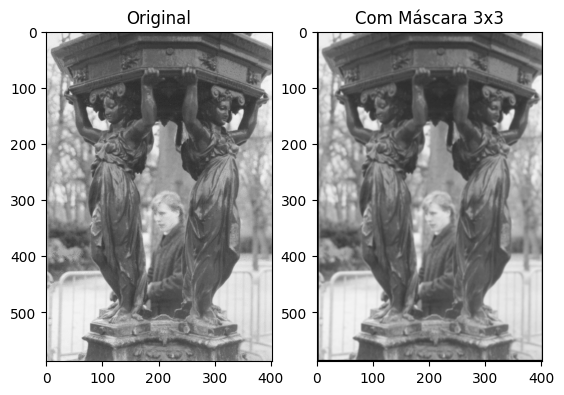

In [64]:
# code here

def apply_avg_filter(im_width, im_height, img_to_mask, mask_size):
    imgOut = np.zeros((im_height, im_width))

    for i in range(0, im_height):
        for j in range(0, im_width):
            if(i > np.ceil(mask_size/2) and ( i < im_height-np.ceil(mask_size/2)) and j > np.ceil(mask_size/2) and (j < im_width - np.ceil(mask_size/2))):
                infI = int(np.ceil(i-(mask_size/2)))
                supI = int(np.ceil(i+(mask_size/2)))

                infJ = int(np.ceil(j-(mask_size/2)))
                supJ = int(np.ceil(j+(mask_size/2)))

                block = img_to_mask[infI:supI, infJ: supJ]
                imgOut[i,j] = np.average(block)
    return imgOut



img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

height = img1.shape[0]
width = img1.shape[1]
maskSize = 3

out = apply_avg_filter(width, height, img1, maskSize)
plt.subplot(1,2,2)
plt.title("Com Máscara 3x3")
plt.imshow(out, cmap='gray', vmin=0, vmax=255)


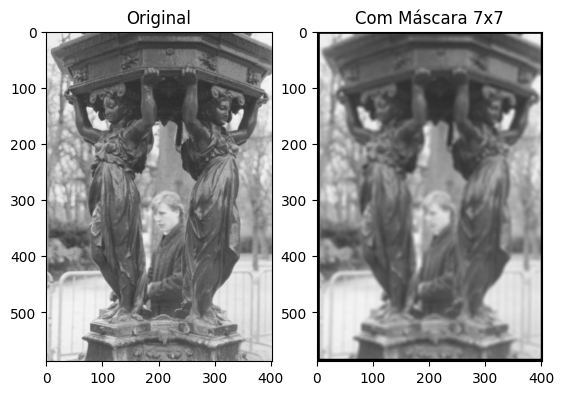

In [66]:
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

out = apply_avg_filter(width, height, img1, 7)
plt.subplot(1,2,2)
plt.title("Com Máscara 7x7")
plt.imshow(out, cmap='gray', vmin=0, vmax=255)

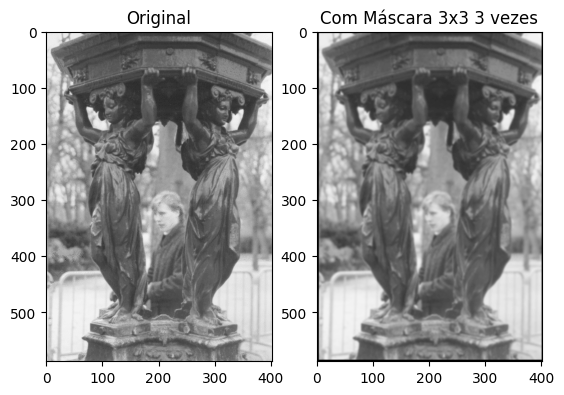

In [69]:
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

out = apply_avg_filter(width, height, img1, 3)
out = apply_avg_filter(width, height, out, 3)
out = apply_avg_filter(width, height, out, 3)

plt.subplot(1,2,2)
plt.title("Com Máscara 3x3 3 vezes")
plt.imshow(out, cmap='gray', vmin=0, vmax=255)

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

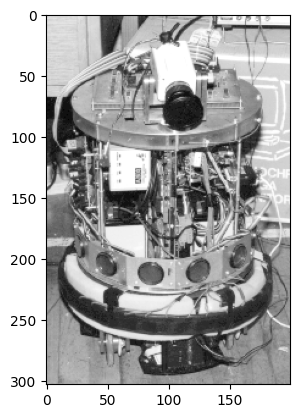

In [27]:
#  code here

img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

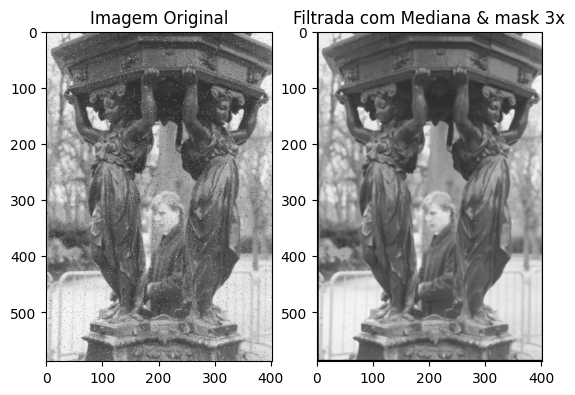

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def apply_median_filter(im_width, im_height, img_to_mask, mask_size):
    imgOut = np.zeros((im_height, im_width))

    for i in range(0, im_height):
        for j in range(0, im_width):
            if(i > np.ceil(mask_size/2) and ( i < im_height-np.ceil(mask_size/2)) and j > np.ceil(mask_size/2) and (j < im_width - np.ceil(mask_size/2))):
                infI = int(np.ceil(i-(mask_size/2)))
                supI = int(np.ceil(i+(mask_size/2)))

                infJ = int(np.ceil(j-(mask_size/2)))
                supJ = int(np.ceil(j+(mask_size/2)))

                block = np.matrix(img_to_mask[infI:supI, infJ: supJ])
                blockArr = np.array(block.reshape(1,(mask_size*mask_size)))
                median = np.ceil(np.median(blockArr[0]))
                imgOut[i,j] = median
    return imgOut;

img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

width = img3.shape[1]
height = img3.shape[0]
maskSize = 3

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

outImg3 = apply_median_filter(width, height, img3, maskSize)

plt.subplot(1,2,2)
plt.title("Filtrada com Mediana & mask 3x")
plt.imshow(outImg3, cmap='gray', vmin=0, vmax=255)

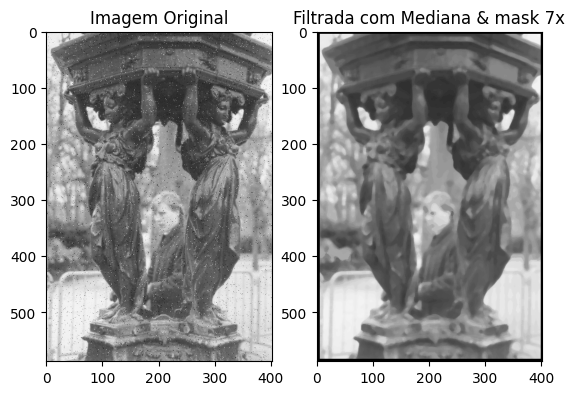

In [18]:
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

maskSize = 7
outImg3 = apply_median_filter(width, height, img3, maskSize)

plt.subplot(1,2,2)
plt.title("Filtrada com Mediana & mask 7x")
plt.imshow(outImg3, cmap='gray', vmin=0, vmax=255)

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

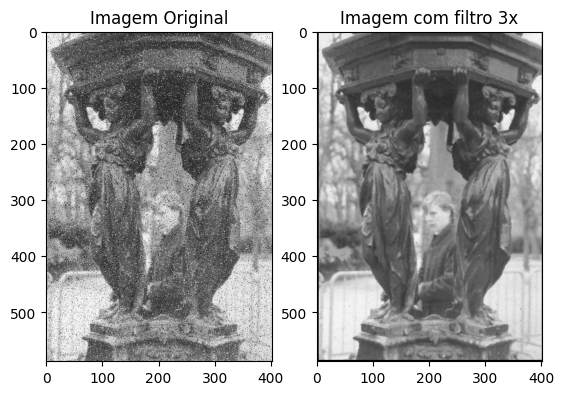

In [19]:
#  code here
img4 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

width4 = img4.shape[1]
height4 = img4.shape[0]
maskSize = 3

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

outimg4 = apply_median_filter(width, height, img4, maskSize)

plt.subplot(1,2,2)
plt.title("Imagem com filtro 3x")
plt.imshow(outimg4, cmap='gray', vmin=0, vmax=255)


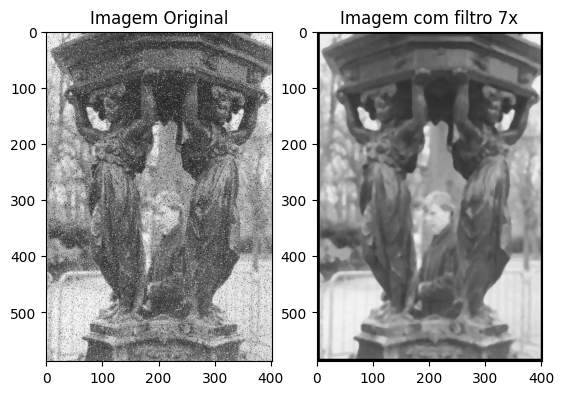

In [20]:
maskSize = 7

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

outimg4 = apply_median_filter(width, height, img4, maskSize)

plt.subplot(1,2,2)
plt.title("Imagem com filtro 7x")
plt.imshow(outimg4, cmap='gray', vmin=0, vmax=255)